In [11]:
import pandas as pd
df = pd.read_csv("/content/cleaned_dataset.csv")

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix


,Unnamed: 0,brand,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,sales_price
Unnamed: 0,1.000000,0.959717,0.138742,-0.089553,-0.122113,0.144331,0.189252,0.122239,NaN,0.199727,-0.418172,-0.331991
brand,0.959717,1.000000,0.132482,-0.170389,-0.145720,0.171309,0.272252,0.179594,NaN,0.309038,-0.502192,-0.435676
processor,0.138742,0.132482,1.000000,0.069197,-0.111208,0.052115,0.063141,-0.079011,NaN,-0.083441,0.052044,-0.133188
screen_size,-0.089553,-0.170389,0.069197,1.000000,0.028955,-0.222411,-0.730834,-0.491259,NaN,-0.607396,0.400544,0.336011
ROM,-0.122113,-0.145720,-0.111208,0.028955,1.000000,0.671231,0.215765,0.242953,NaN,-0.108195,0.060545,0.600311
RAM,0.144331,0.171309,0.052115,-0.222411,0.671231,1.000000,0.520222,0.549587,NaN,0.212096,-0.199763,0.262442
display_size,0.189252,0.272252,0.063141,-0.730834,0.215765,0.520222,1.000000,0.649024,NaN,0.697860,-0.497608,-0.220143
num_rear_camera,0.122239,0.179594,-0.079011,-0.491259,0.242953,0.549587,0.649024,1.000000,NaN,0.589577,-0.384754,-0.241302
num_front_camera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
battery_capacity,0.199727,0.309038,-0.083441,-0.607396,-0.108195,0.212096,0.697860,0.589577,NaN,1.000000,-0.568380,-0.597633


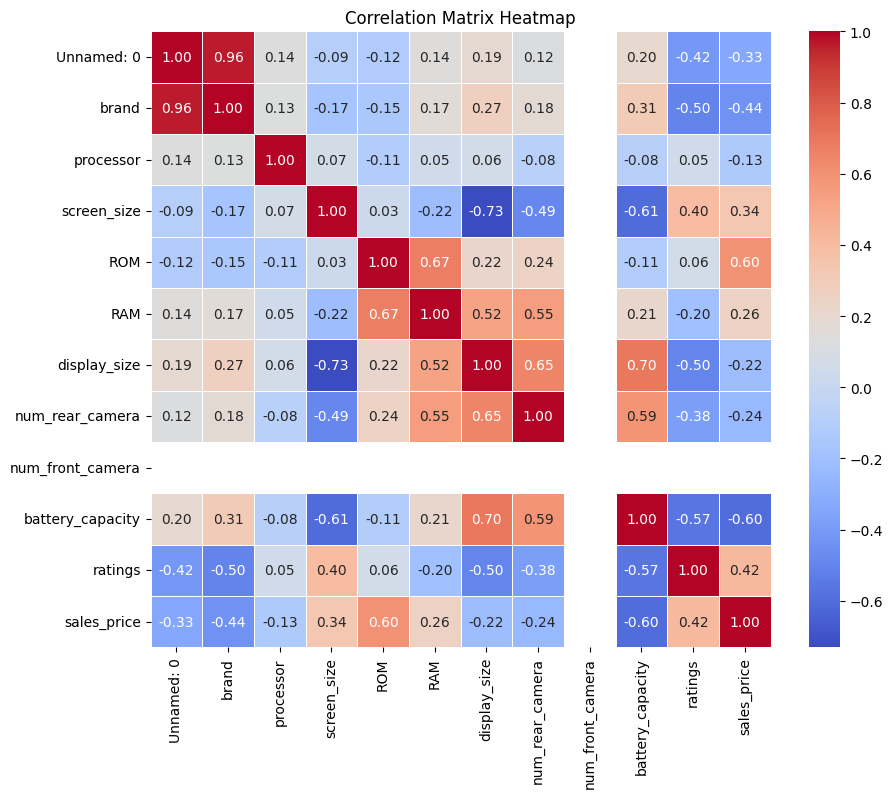

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


---

## Model Development Documentation

### 1. Exploratory Data Analysis (EDA)

Before diving into model development, we performed an Exploratory Data Analysis (EDA) on the cleaned dataset to uncover significant patterns or trends. This step is crucial as it helps us understand the relationships between key variables and the distribution of our target variable.

#### **Correlation Analysis**

We used correlation analysis to understand the linear relationships between the numerical features in the dataset. The correlation coefficient (r) ranges from -1 to 1:
- **1** indicates a perfect positive correlation (as one variable increases, the other also increases).
- **-1** indicates a perfect negative correlation (as one variable increases, the other decreases).
- **0** indicates no correlation.

**Findings:**
- Features like `ROM`, `RAM`, and `display_size` show strong correlations with `sales_price`, which can be valuable for our model.
- Features like `num_front_camera` have zero variance across all rows, meaning all values are identical. Such features do not contribute any useful information and should be excluded from the model.

### 2. Model Development

#### **Target Variable Selection**

For our regression analysis, we chose `sales_price` as the target variable because it is the main outcome we want to predict based on other features.

#### **Feature Selection**

After correlation analysis, we identified relevant features for predicting `sales_price`:
- `brand`
- `processor`
- `screen_size`
- `ROM`
- `RAM`
- `display_size`
- `num_rear_camera`
- `battery_capacity`
- `ratings`

We dropped the `num_front_camera` feature due to its lack of variance.

#### **Model Choice: Linear Regression**

Linear Regression was chosen for the following reasons:
- **Simplicity:** Linear regression is straightforward and interpretable, making it a good starting point.
- **Assumptions:** It assumes a linear relationship between the dependent and independent variables, which is reasonable for many real-world datasets.
- **Performance Benchmarking:** It provides a baseline performance measure to compare with more complex models.

---


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features and target
X = df.drop(columns=['sales_price', 'num_front_camera'])
y = df['sales_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model development
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and performance evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression R²: {r2}')

Linear Regression R²: 0.76542415123261


#### **Model Results**

The R² value for the Linear Regression model was found to be `0.7654`. This indicates that approximately 76.54% of the variance in the sales price can be explained by the features in the model.

### 3. Justification of Model Choice

- **Linear Relationship:** Linear regression assumes that there is a linear relationship between the predictors and the target variable. Given the results from our correlation analysis, this assumption is reasonable for our dataset.
- **Performance Benchmarking:** The R² value provides a measure of how well our model performs. It is a useful benchmark to compare with more complex models.

### 4. Conclusion

The initial Linear Regression model provided a solid baseline for predicting sales price. Based on the R² value, the model captures a significant portion of the variability in the sales price. Further improvements can be made by exploring more complex models and optimizing hyperparameters to enhance prediction accuracy.
